# Python Codes - Part 3 - Repeated k-fold Cross-Val Group 2 WW

This Python code notebook is for the paper title "Quantitating Wastewater Characteristic Parameters Using Neural Network Regression Modeling on Spectral Reflectance" by Fortela, D.L.B. et al. (2023).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import  train_test_split
 
import tensorflow as tf
from tensorflow.keras import regularizers

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
#Load data

data = pd.read_excel("Group_2_WW_csv.csv")

X = data.values[1:,7:].astype('float32')
y = data[["BOD","COD","NH3_N"]].values[1:].astype("float32")

In [4]:
# use learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=100,
    decay_rate=0.7)


def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(1000, activation='linear'))
  model.add(tf.keras.layers.Dense(1000, activation='linear'))
  #model.add(tf.keras.layers.Dense(1000, activation='linear'))
  model.add(tf.keras.layers.Dense(3, activation='linear'))
  model.compile(loss = 'mean_absolute_error' , optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule))
 
  return model

In [5]:
from sklearn.model_selection import KFold, RepeatedKFold
 
folds=3
repeat=10
    
scaler = MinMaxScaler()
scaler.fit(X)
X_input = scaler.transform(X)
    
for train_index,test_index in RepeatedKFold(n_splits = folds, n_repeats=repeat, random_state=2).split(X_input):
  x_train,x_test=X[train_index],X[test_index]
  y_train,y_test=y[train_index],y[test_index]

   
  model=create_model()
  history = model.fit(x_train, y_train,epochs=1000, validation_data=(x_test, y_test), verbose=0)
   
  #print('Model evaluation ',model.evaluate(x_test,y_test))

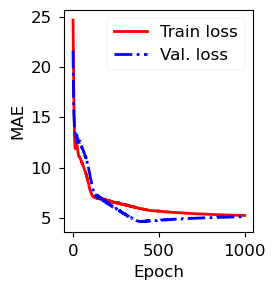

In [6]:
with plt.style.context(('seaborn-paper')):
    fig, ax = plt.subplots(figsize=(3, 3))
 
    ax.plot(history.history['loss'], linewidth=2, label='Train loss', color='red')
    ax.plot(history.history['val_loss'], linewidth=2, label='Val. loss', linestyle='-.', color='blue')
 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_xlabel('Epoch',fontsize=12)
    ax.set_ylabel('MAE',fontsize=12)
    plt.legend(fontsize=12)
 
    plt.tight_layout()
plt.savefig('Training_MAE_loss.svg',dpi=300, bbox_inches="tight", pad_inches=0.05)
plt.show()

In [7]:
Xs_train = x_train
Xs_test = x_test


predictions = model.predict(Xs_test)#.flatten()
rmse, mae, score = np.sqrt(mean_squared_error(y_test, predictions)), \
                   mean_absolute_error(y_test, predictions), r2_score(y_test, predictions)
print("R2: %5.3f, RMSE: %5.3f, MAE: %5.3f" %(score, rmse, mae))

1/1 [==============================] - 0s 47ms/step
R2: 0.745, RMSE: 9.642, MAE: 5.125


In [8]:
# see values of predictions on test dataset
predictions

array([[ 6.3959241e+00,  9.7104156e+01,  1.3377512e+00],
       [ 7.1286883e+00,  1.1372544e+02,  1.2815554e+00],
       [ 4.9862647e+00,  8.7473763e+01,  8.8119143e-01],
       [ 6.7541952e+00,  1.1489039e+02,  9.2871529e-01],
       [ 5.8335814e+00,  9.0826859e+01,  9.7282767e-01],
       [ 4.3072243e+00,  5.0790558e+01,  7.5243104e-01],
       [ 2.1245642e+00,  1.7722759e+01,  1.6638520e-01],
       [ 3.1916006e+00,  3.7553505e+01,  3.7967509e-01],
       [ 1.3572901e+00,  1.3663461e+01, -8.1778474e-02]], dtype=float32)

In [9]:
# see values of actual data on test dataset
y_test

array([[7.5892859e+00, 1.2500000e+02, 1.4768569e+00],
       [6.9821429e+00, 1.1500000e+02, 1.3537860e+00],
       [5.7678571e+00, 9.5000000e+01, 1.1076430e+00],
       [5.4642859e+00, 9.0000000e+01, 1.0461071e+00],
       [4.5535712e+00, 7.5000000e+01, 8.6150002e-01],
       [2.4285715e+00, 4.0000000e+01, 4.3075001e-01],
       [1.8214285e+00, 3.0000000e+01, 3.0767900e-01],
       [4.6500001e+00, 1.5000000e+01, 1.2000000e-02],
       [3.0999999e+00, 1.0000000e+01, 9.9999998e-03]], dtype=float32)

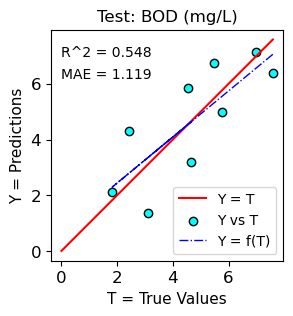

In [10]:
# Plot BOD test dataset

# subset the data
predicted_value = predictions[:,0]
true_value = y_test[:,0]

x_axis = true_value
y_axis = predicted_value

# create plot
plt.figure(figsize=(3,3))
p1 = max(max(true_value), max(true_value))
p2 = min(min(true_value), min(true_value))
plt.plot([0, p1], [0, p1], 'r-', label="Y = T")

plt.xticks(np.arange(0, max(x_axis), 2))
plt.yticks(np.arange(0, max(y_axis), 2))

plt.axis('equal')
plt.scatter(true_value, predicted_value, c='aqua', alpha=1, edgecolors='black', label="Y vs T")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add reference line
#plt.axvline(x=25, color='black', ls='--', lw=1)

# add titles
plt.xlabel('T = True Values', fontsize=11)
plt.ylabel('Y = Predictions', fontsize=11)
plt.title("Test: BOD (mg/L)")


# calc r-squared
z = np.polyfit(x_axis, y_axis, 1)  
p = np.poly1d(z)  

# plot line fit
plt.plot(x_axis,p(x_axis),'b-.', lw=1, label="Y = f(T)") 
#plt.plot(x_axis, y_axis, 'og-', label=("y=%.6fx+(%.6f)"%(z[0],z[1]))) 

r_squared = r2_score(x_axis, y_axis)
plt.annotate("R^2 = {:.3f}".format(r_squared), (0, 7))


# annonate MAE
# import the module
from sklearn.metrics import mean_absolute_error as mae
# calculate MAE
error = mae(x_axis, y_axis)
plt.annotate("MAE = {:.3f}".format(error), (0, 6.2))


# show legend
plt.legend(loc="lower right")

plt.savefig('Test_BOD.svg',dpi=300, bbox_inches="tight", pad_inches=0.05)
plt.show()

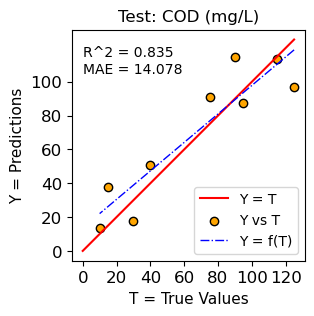

In [11]:
# Plot COD test dataset

# subset the data
predicted_value = predictions[:,1]
true_value = y_test[:,1]

x_axis = true_value
y_axis = predicted_value

# create plot
plt.figure(figsize=(3,3))
p1 = max(max(true_value), max(true_value))
p2 = min(min(true_value), min(true_value))
plt.plot([0, p1], [0, p1], 'r-', label="Y = T")

plt.xticks(np.arange(0, max(x_axis), 20))
plt.yticks(np.arange(0, max(y_axis), 20))

plt.axis('equal')
plt.scatter(true_value, predicted_value, c='orange', alpha=1, edgecolors='black', label="Y vs T")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add reference line
#plt.axvline(x=25, color='black', ls='--', lw=1)

# add titles
plt.xlabel('T = True Values', fontsize=11)
plt.ylabel('Y = Predictions', fontsize=11)
plt.title("Test: COD (mg/L)")


# calc r-squared
z = np.polyfit(x_axis, y_axis, 1)  
p = np.poly1d(z)  

# plot line fit
plt.plot(x_axis,p(x_axis),'b-.', lw=1, label="Y = f(T)") 
#plt.plot(x_axis, y_axis, 'og-', label=("y=%.6fx+(%.6f)"%(z[0],z[1]))) 

r_squared = r2_score(x_axis, y_axis)
plt.annotate("R^2 = {:.3f}".format(r_squared), (0, 115))


# annonate MAE
# import the module
from sklearn.metrics import mean_absolute_error as mae
# calculate MAE
error = mae(x_axis, y_axis)
plt.annotate("MAE = {:.3f}".format(error), (0, 105))


# show legend
plt.legend(loc="lower right")

plt.savefig('Test_COD.svg',dpi=300, bbox_inches="tight", pad_inches=0.05)
plt.show()

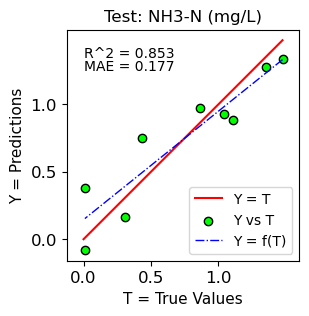

In [12]:
# Plot NH3-N test dataset

# subset the data
predicted_value = predictions[:,2]
true_value = y_test[:,2]

x_axis = true_value
y_axis = predicted_value

# create plot
plt.figure(figsize=(3,3))
p1 = max(max(true_value), max(true_value))
p2 = min(min(true_value), min(true_value))
plt.plot([0, p1], [0, p1], 'r-', label="Y = T")

plt.xticks(np.arange(0, max(x_axis), 0.5))
plt.yticks(np.arange(0, max(y_axis), 0.5))

plt.axis('equal')
plt.scatter(true_value, predicted_value, c='lime', alpha=1, edgecolors='black', label="Y vs T")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add reference line
#plt.axvline(x=25, color='black', ls='--', lw=1)

# add titles
plt.xlabel('T = True Values', fontsize=11)
plt.ylabel('Y = Predictions', fontsize=11)
plt.title("Test: NH3-N (mg/L)")


# calc r-squared
z = np.polyfit(x_axis, y_axis, 1)  
p = np.poly1d(z)  

# plot line fit
plt.plot(x_axis,p(x_axis),'b-.', lw=1, label="Y = f(T)") 
#plt.plot(x_axis, y_axis, 'og-', label=("y=%.6fx+(%.6f)"%(z[0],z[1]))) 

r_squared = r2_score(x_axis, y_axis)
plt.annotate("R^2 = {:.3f}".format(r_squared), (0, 1.35))


# annonate MAE
# import the module
from sklearn.metrics import mean_absolute_error as mae
# calculate MAE
error = mae(x_axis, y_axis)
plt.annotate("MAE = {:.3f}".format(error), (0, 1.25))


# show legend
plt.legend(loc="lower right")

plt.savefig('Test_NH3_N.svg',dpi=300, bbox_inches="tight", pad_inches=0.05)
plt.show()